# 1. load drive and install and load dependencies

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 61.7 MB/s 
     |████████████████████████████████| 6.8 MB 36.6 MB/s 
     |████████████████████████████████| 1.3 MB 49.4 MB/s 
     |████████████████████████████████| 271 kB 74.5 MB/s 
     |████████████████████████████████| 261 kB 73.3 MB/s 
     |████████████████████████████████| 16.9 MB 95 kB/s 
     |████████████████████████████████| 1.7 MB 65.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 53.8 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 51.0 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 3.1 MB 53.9 MB/s 
     |████████████████████████████████| 62 kB 806 kB/s 
     |█████████████████████

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 189 kB 5.2 MB/s 
     |████████████████████████████████| 23.2 MB 104 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.4 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.8.1 which is incompatible.
pycaret 2.3.4 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_nonrandom_cellstate.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_nonrandom_cellstate.zip
  inflating: subsample_nonrandom_cellstate.csv  


In [ ]:
df = pd.read_csv('subsample_nonrandom_cellstate.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell,CD8 T-cell,CD8 T-cell (unspecified)
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,-0.313821,-0.088790,-0.466089,-0.226714,-0.270607,-0.353075,0.574824,-0.335640,-0.314195,-0.323180,-0.090300,-0.250339,-0.391124,-0.246797,-0.189673,-0.616370,-0.316149,-0.356780,1.552249,-0.499215,-0.194878,-0.352990,-0.163568,-0.190939,-0.415853,-0.124281,-0.304426,-0.387812,-0.252874,-0.383583,0.478811,...,-0.423910,3.649650,0.573384,-0.158770,-0.188699,2.267675,-0.512170,-0.245922,3.651268,-0.132690,1.799477,-0.281949,-0.423601,-1.135320,-0.286250,-0.279708,1.809676,-0.224231,-0.168162,0.632239,0.123286,-0.175944,-0.220324,-0.176385,2.226596,-0.234638,-0.340674,0.107710,-0.300499,-0.697762,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell,CD4 T-cell,CD4 naive T-cell
GSM3148575_AAACCTGCACCCATGG,-0.062416,-0.195464,-0.065144,-0.042499,-0.135852,-0.351616,-0.248396,-0.270842,-0.268271,-0.325609,-0.101256,-0.445847,-0.054851,-0.181723,-0.380540,0.745766,-0.340088,-0.296601,-0.241316,-0.085254,-0.250838,-0.386196,-0.265224,-0.204572,1.161881,-0.348388,-0.398905,-0.398163,-0.419860,-0.160300,-0.324923,-0.167410,-0.184236,-0.413217,-0.116076,-0.267485,2.620898,-0.213646,-0.346287,0.473759,...,-0.407552,-0.199226,0.747376,-0.154697,-0.173045,-0.448623,-0.300369,-0.162582,-0.359982,-0.056778,-0.593834,-0.284930,-0.450226,-0.950650,-0.266962,-0.173080,-0.193029,-0.163202,-0.117656,-0.828857,0.615416,-0.188198,-0.232735,6.823150,-0.344204,-0.206602,-0.350901,-1.130293,-1.156253,-0.963172,-0.502495,-1.301666,-0.408829,-0.945157,-0.162975,-0.711097,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell,CD8 activated T-cell (unspecified)
GSM3148575_AAACCTGCAGATGGGT,-0.082079,1.060037,-0.191346,-0.169694,-0.122829,2.005691,-0.276818,-0.259534,-0.277136,-0.297223,-0.101166,1.608985,-0.140124,-0.271896,-0.354905,0.266322,-0.353312,-0.320826,-0.314254,-0.094236,-0.274962,-0.415112,-0.245446,-0.184044,0.767068,-0.328530,-0.382333,-0.381429,-0.453147,-0.170926,-0.326742,-0.175238,-0.190458,-0.398930,-0.119770,-0.284986,-0.348206,-0.230224,-0.346436,0.211194,...,-0.392569,-0.233672,0.831479,-0.168126,3.846999,-0.479853,1.033201,-0.187547,-0.372761,-0.085260,1.248135,-0.266786,-0.417092,-1.064433,-0.307412,1.567685,-0.260816,2.432520,-0.142164,1.474821,0.259275,-0.174021,4.692780,-0.172141,-0.333820,-0.195588,-0.349128,0.346556,-0.558187,-0.403170,-0.261556,-1.011853,0.050656,-0.792443,0.404270,0.123457,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell,CD8 a

In [ ]:
# df = pd.read_csv('/content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_10_nonrandom.csv', index_col=1)
# df = df.drop(columns=['Unnamed: 0'])
# df.head()

In [ ]:
pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)

,count,percentage
CD8 activated T-cell (unspecified),250,0.027827
granulocyte,250,0.027827
CD4 regulatory T-cell (unspecified),250,0.027827
classical monocyte,250,0.027827
CD4 T-cell (unspecified),250,0.027827
CD8 T-cell (unspecified),250,0.027827
CD8 exhausted resident memory T-cell,250,0.027827
CD8 cytotoxic T-cell (unspecified),250,0.027827
NK T-cell (unspecified),250,0.027827
CD8 exhausted T-cell (unspecified),250,0.027827


# 3. split data and oversample some classes

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2', 'cell_type_3'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. logistic regression

## without oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=100000)  

#  The warning means what it mainly says: Suggestions to try to make the solver (the algorithm) converges.
# lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms provided by Scikit-Learn Library.
lr.fit(X_train, y_train) # takes about 49mins

LogisticRegression(max_iter=100000)

In [ ]:
from sklearn.model_selection import cross_val_score # 
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.80503132, 0.81136231, 0.81012375, 0.80264985, 0.82218852])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_43classes.sav'
joblib.dump(lr, filename)

['lr_model_43classes.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  80.02
F1 of logistic regression model :  79.59
F1 macro of logistic regression model :  74.37


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.91      0.84      0.87        50
                    CD4 T-cell (unspecified)       0.83      0.48      0.61        50
                   CD4 central memory T-cell       0.44      0.36      0.40        11
                CD4 follicular helper T-cell       0.93      1.00      0.96        50
             CD4 helper T-cell (unspecified)       0.66      0.86      0.75        50
                            CD4 naive T-cell       0.59      0.66      0.62        50
         CD4 regulatory T-cell (unspecified)       0.93      0.80      0.86        50
                    CD8 T-cell (unspecified)       0.61      0.70      0.65        50
          CD8 activated T-cell (unspecified)       0.57      0.54      0.56        50
                   CD8 central memory T-cell       0.00      0.00      0.00         6
          CD8 cytotoxic T-cell (unspecified)       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  0,  0, ...,  0,  0,  0],
       [ 0, 24,  0, ...,  0,  0,  0],
       [ 0,  1,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 18,  0,  0],
       [ 0,  0,  0, ...,  0, 50,  0],
       [ 0,  0,  0, ...,  0,  0, 48]])

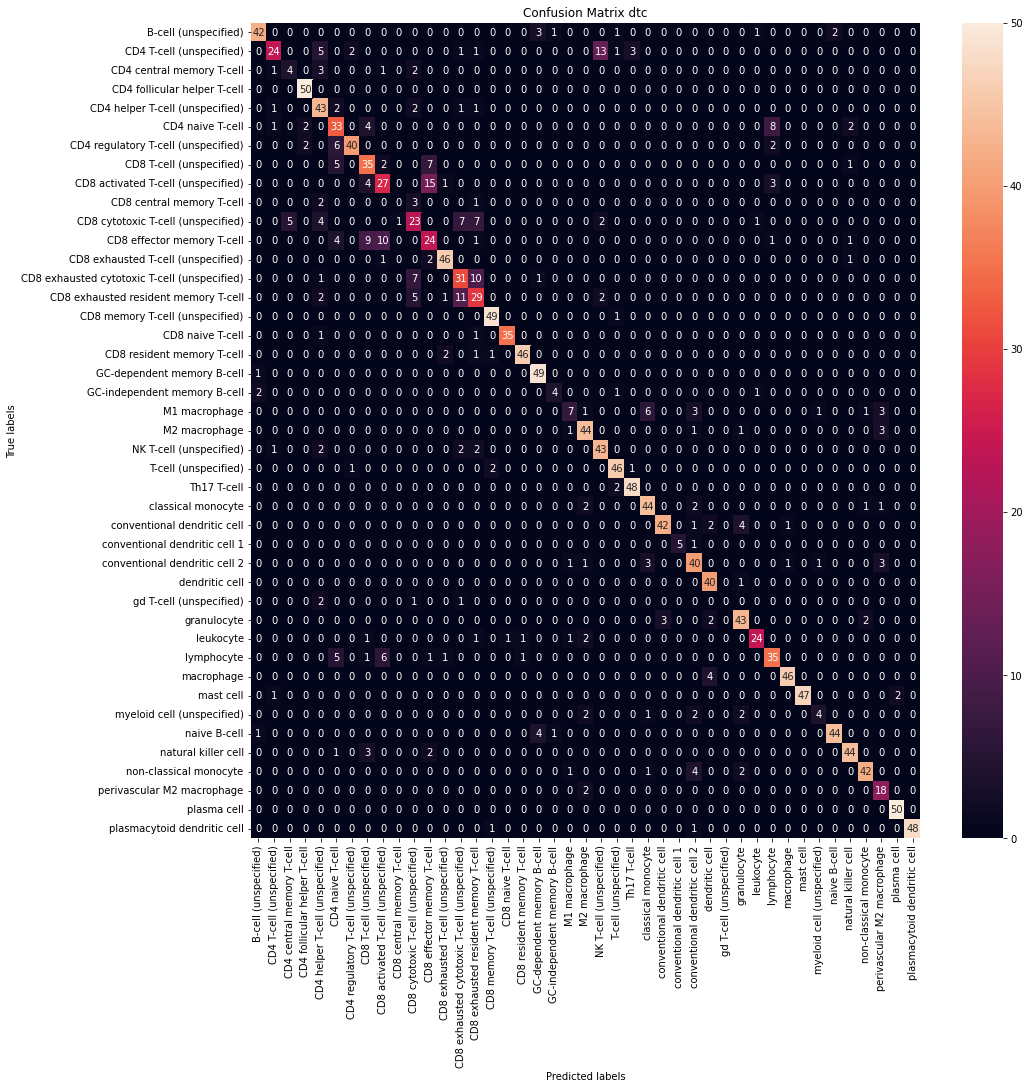

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc43Classes20211028.png')
plt.show()

## oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

CD8 exhausted T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 effector memory T-cell                      200
CD4 regulatory T-cell (unspecified)             200
classical monocyte                              200
CD4 T-cell (unspecified)                        200
CD8 exhausted resident memory T-cell            200
CD8 cytotoxic T-cell (unspecified)              200
NK T-cell (unspecified)                         200
CD8 resident memory T-cell                      200
CD8 memory T-cell (unspecified)                 200
B-cell (unspecified)                            200
CD4 helper T-cell (unspecified)                 200
M2 macrophage                                   200
natural killer cell                             200
plasmacytoid dendritic cell                     200
T-cell (unspecified)                            200
lymphocyte                                      200
non-classical monocyte                          200
granulocyte 

In [ ]:
# Original

# oversampling_weights= {
    
# "CD4 T-cell (unspecified)": 250,
# "lymphocyte":	250,	
# "non-classical monocyte":	250,	
# "CD8 resident memory T-cell":	250,	
# "mast cell":	250,	
# "plasma cell":	250,	
# "classical monocyte":	250,	
# "CD8 memory T-cell (unspecified)":	250,	
# "dendritic cell":	250,	
# "conventional dendritic cell 2": 250,	
# "CD8 cytotoxic T-cell (unspecified)":	250,	
# "natural killer cell":	250,	
# "CD4 regulatory T-cell (unspecified)":	250,	
# "naive B-cell":	250,	
# "T-cell (unspecified)":	250,	
# "Th17 T-cell":	250,	
# "M2 macrophage":	250,	
# "CD8 exhausted T-cell (unspecified)":	250,	
# "CD4 naive T-cell":	250,	
# "macrophage":	250,	
# "CD8 activated T-cell (unspecified)":	250,	
# "B-cell (unspecified)":	250,	
# "CD8 effector memory T-cell":	250,	
# "plasmacytoid dendritic cell":	250,	
# "GC-dependent memory B-cell":	250,	
# "granulocyte":	250,	
# "CD8 exhausted cytotoxic T-cell (unspecified)":	250,	
# "CD8 T-cell (unspecified)":	250,	
# "CD4 follicular helper T-cell":	250,	
# "CD8 exhausted resident memory T-cell":	250,	
# "conventional dendritic cell":	250,	
# "NK T-cell (unspecified)":	250,	
# "CD8 naive T-cell":	250,	
# "CD4 helper T-cell (unspecified)":	250,	
# "leukocyte":	225,	
# "M1 macrophage":	159,	
# "perivascular M2 macrophage":	154,	
# "myeloid cell (unspecified)":	84,	
# "CD4 central memory T-cell":	83,	
# "GC-independent memory B-cell":	57,	
# "CD8 central memory T-cell" :	49,	
# "conventional dendritic cell 1": 145, 	
# "gd T-cell (unspecified)":	29	
# }

In [ ]:
# Manipulated

oversampling_weights= {
    
"CD4 T-cell (unspecified)": 200,
"lymphocyte":	200,	
"non-classical monocyte":	200,	
"CD8 resident memory T-cell":	200,	
"mast cell":	200,	
"plasma cell":	200,	
"classical monocyte":	200,	
"CD8 memory T-cell (unspecified)":	200,	
"dendritic cell":	200,	
"conventional dendritic cell 2": 200,	
"CD8 cytotoxic T-cell (unspecified)":	200,	
"natural killer cell":	200,	
"CD4 regulatory T-cell (unspecified)":	200,	
"naive B-cell":	200,	
"T-cell (unspecified)":	200,	
"Th17 T-cell":	200,	
"M2 macrophage":	200,	
"CD8 exhausted T-cell (unspecified)":	200,	
"CD4 naive T-cell":	200,	
"macrophage":	200,	
"CD8 activated T-cell (unspecified)":	200,	
"B-cell (unspecified)":	200,	
"CD8 effector memory T-cell":	200,	
"plasmacytoid dendritic cell":	200,	
"GC-dependent memory B-cell":	200,	
"granulocyte":	200,	
"CD8 exhausted cytotoxic T-cell (unspecified)":	200,	
"CD8 T-cell (unspecified)":	200,	
"CD4 follicular helper T-cell":	200,	
"CD8 exhausted resident memory T-cell":	200,	
"conventional dendritic cell":	200,	
"NK T-cell (unspecified)":	200,	
"CD8 naive T-cell":	200,	
"CD4 helper T-cell (unspecified)":	200,	
"leukocyte":	200,	
"M1 macrophage":	160,	
"perivascular M2 macrophage":	160,	
"myeloid cell (unspecified)":	100,	
"CD4 central memory T-cell":	90,	
"GC-independent memory B-cell":	60,	
"CD8 central memory T-cell" :	50,	
"conventional dendritic cell 1": 180, 	
"gd T-cell (unspecified)":	60	
}


In [ ]:
# # Manipulated

# oversampling_weights= {
    
# "CD4 T-cell (unspecified)": 200,
# "lymphocyte":	200,	
# "non-classical monocyte":	200,	
# "CD8 resident memory T-cell":	200,	
# "mast cell":	200,	
# "plasma cell":	200,	
# "classical monocyte":	200,	
# "CD8 memory T-cell (unspecified)":	200,	
# "dendritic cell":	200,	
# "conventional dendritic cell 2": 200,	
# "CD8 cytotoxic T-cell (unspecified)":	200,	
# "natural killer cell":	200,	
# "CD4 regulatory T-cell (unspecified)":	200,	
# "naive B-cell":	200,	
# "T-cell (unspecified)":	200,	
# "Th17 T-cell":	200,	
# "M2 macrophage":	200,	
# "CD8 exhausted T-cell (unspecified)":	200,	
# "CD4 naive T-cell":	200,	
# "macrophage":	200,	
# "CD8 activated T-cell (unspecified)":	200,	
# "B-cell (unspecified)":	200,	
# "CD8 effector memory T-cell":	200,	
# "plasmacytoid dendritic cell":	200,	
# "GC-dependent memory B-cell":	200,	
# "granulocyte":	200,	
# "CD8 exhausted cytotoxic T-cell (unspecified)":	200,	
# "CD8 T-cell (unspecified)":	200,	
# "CD4 follicular helper T-cell":	200,	
# "CD8 exhausted resident memory T-cell":	200,	
# "conventional dendritic cell":	200,	
# "NK T-cell (unspecified)":	200,	
# "CD8 naive T-cell":	200,	
# "CD4 helper T-cell (unspecified)":	200,	
# "leukocyte":	180,	
# "M1 macrophage":	127,	
# "perivascular M2 macrophage":	123,	
# "myeloid cell (unspecified)":	100,	
# "CD4 central memory T-cell":	100,	
# "GC-independent memory B-cell":	70,	
# "CD8 central memory T-cell" :	50,	
# "conventional dendritic cell 1": 50, 	
# "gd T-cell (unspecified)":	50	
# }

In [ ]:
smtn = sampler = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

CD8 exhausted T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 effector memory T-cell                      200
CD4 regulatory T-cell (unspecified)             200
classical monocyte                              200
CD4 T-cell (unspecified)                        200
CD8 exhausted resident memory T-cell            200
CD8 cytotoxic T-cell (unspecified)              200
NK T-cell (unspecified)                         200
CD8 resident memory T-cell                      200
CD8 memory T-cell (unspecified)                 200
B-cell (unspecified)                            200
CD4 helper T-cell (unspecified)                 200
M2 macrophage                                   200
natural killer cell                             200
plasmacytoid dendritic cell                     200
T-cell (unspecified)                            200
lymphocyte                                      200
non-classical monocyte                          200
granulocyte 

In [ ]:
y_train_smote.value_counts()

CD8 exhausted T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 effector memory T-cell                      200
CD4 regulatory T-cell (unspecified)             200
classical monocyte                              200
CD4 T-cell (unspecified)                        200
CD8 exhausted resident memory T-cell            200
CD8 cytotoxic T-cell (unspecified)              200
NK T-cell (unspecified)                         200
CD8 resident memory T-cell                      200
CD8 memory T-cell (unspecified)                 200
B-cell (unspecified)                            200
CD4 helper T-cell (unspecified)                 200
M2 macrophage                                   200
natural killer cell                             200
plasmacytoid dendritic cell                     200
T-cell (unspecified)                            200
lymphocyte                                      200
non-classical monocyte                          200
granulocyte 

### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=3000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 15min

LogisticRegression(max_iter=3000)

In [ ]:
from sklearn.model_selection import cross_val_score
# Original 
#lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted', max_iter=10000)

# New one without max_iter=10000 because it gives an error message saying that max_iter should not be here 
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.77798559, 0.80121006, 0.82787488, 0.85174894, 0.84069121])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_43classes_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_10_celltype_43classes_smote.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  79.86
F1 weighted of logistic regression model :  79.57
F1 macro of logistic regression model :  74.95


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.95      0.84      0.89        50
                    CD4 T-cell (unspecified)       0.82      0.46      0.59        50
                   CD4 central memory T-cell       0.31      0.36      0.33        11
                CD4 follicular helper T-cell       0.93      1.00      0.96        50
             CD4 helper T-cell (unspecified)       0.67      0.84      0.74        50
                            CD4 naive T-cell       0.60      0.68      0.64        50
         CD4 regulatory T-cell (unspecified)       0.95      0.80      0.87        50
                    CD8 T-cell (unspecified)       0.61      0.70      0.65        50
          CD8 activated T-cell (unspecified)       0.57      0.54      0.56        50
                   CD8 central memory T-cell       0.00      0.00      0.00         6
          CD8 cytotoxic T-cell (unspecified)       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[42,  0,  0, ...,  0,  0,  0],
       [ 0, 23,  0, ...,  0,  0,  0],
       [ 0,  1,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 16,  0,  0],
       [ 0,  0,  0, ...,  0, 50,  0],
       [ 0,  0,  0, ...,  0,  0, 48]])

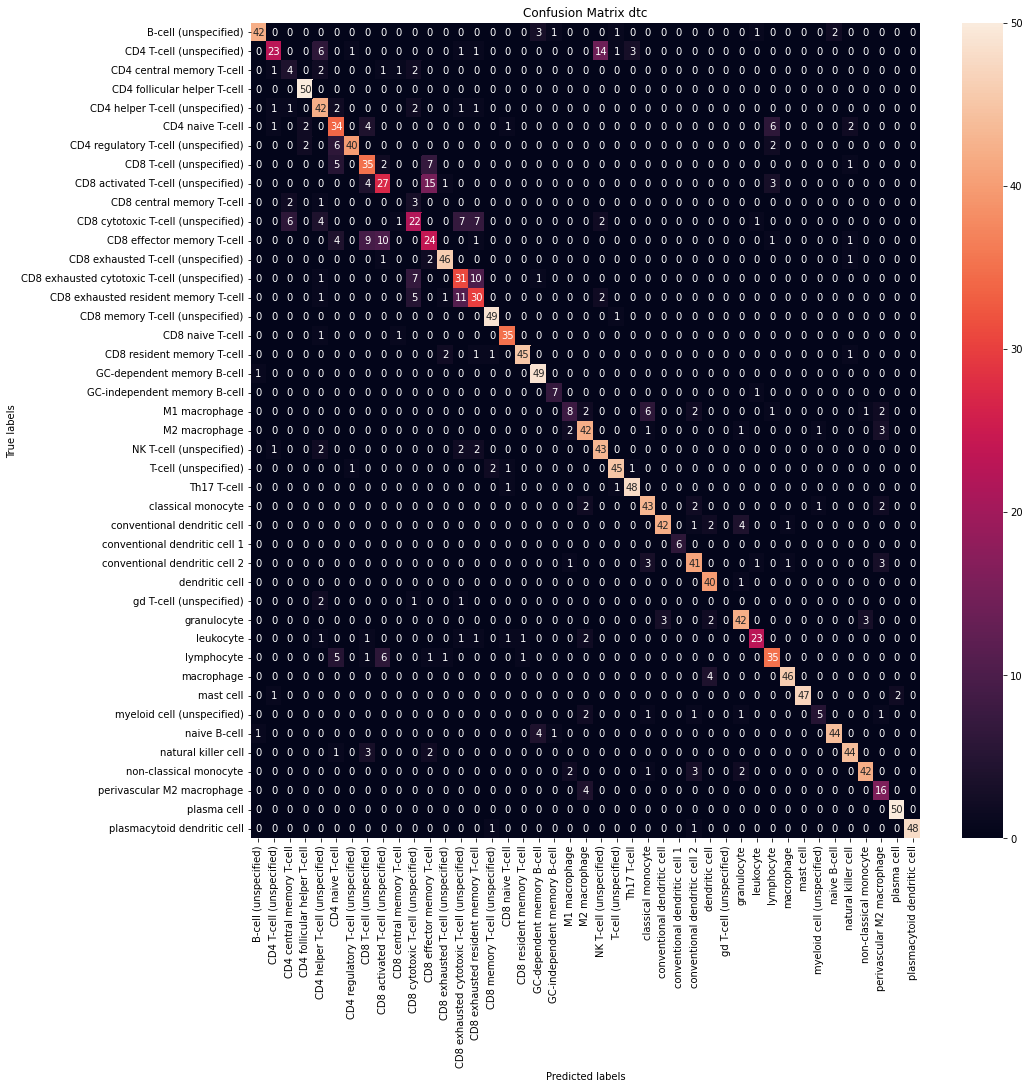

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc43ClassesSmote20211028.png')
plt.show()

# 5. Predict Test Data (random 30% subset)

## import test data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [ ]:
df = pd.read_csv('subset_30.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,24926,0.765611
B-cell,2158,0.066284
macrophage,1823,0.055994
plasma cell,885,0.027183
killer cell,756,0.023221
monocyte,655,0.020119
dendritic cell,597,0.018337
lymphocyte,271,0.008324
granulocyte,243,0.007464
mast cell,147,0.004515


## split data

In [ ]:
X_test = df.drop(columns=['cell_state', 'cell_type'])
y_test = df['cell_state']

## predict data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_43classes_smote.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  43.39
F1 weighted of logistic regression model :  44.71
F1 macro of logistic regression model :  41.85


In [ ]:
y_pred

array(['T-cell (unspecified)',
       'CD8 exhausted cytotoxic T-cell (unspecified)',
       'NK T-cell (unspecified)', ...,
       'CD4 regulatory T-cell (unspecified)',
       'CD8 exhausted resident memory T-cell',
       'CD8 activated T-cell (unspecified)'], dtype=object)

In [ ]:
pd.DataFrame(y_pred).to_csv('prediction_43classes_balanced_subset30.csv', index=False)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.82      0.24      0.37      1528
                    CD4 T-cell (unspecified)       0.09      0.34      0.14       334
                   CD4 central memory T-cell       0.09      0.30      0.14        30
                CD4 follicular helper T-cell       0.91      0.37      0.53      2067
             CD4 helper T-cell (unspecified)       0.25      0.12      0.17      2371
                            CD4 naive T-cell       0.88      0.43      0.58      3433
         CD4 regulatory T-cell (unspecified)       0.89      0.59      0.71      3420
                    CD8 T-cell (unspecified)       0.41      0.14      0.21      1670
          CD8 activated T-cell (unspecified)       0.48      0.33      0.39      1458
                   CD8 central memory T-cell       0.00      0.00      0.00        17
          CD8 cytotoxic T-cell (unspecified)       0.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[362,   5,   1, ...,   0,   5,   0],
       [  0, 115,   1, ...,   0,   0,   0],
       [  0,   1,   9, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  31,   0,   0],
       [ 13,   1,   5, ...,   8, 825,   0],
       [  0,   0,   0, ...,   0,   0, 112]])

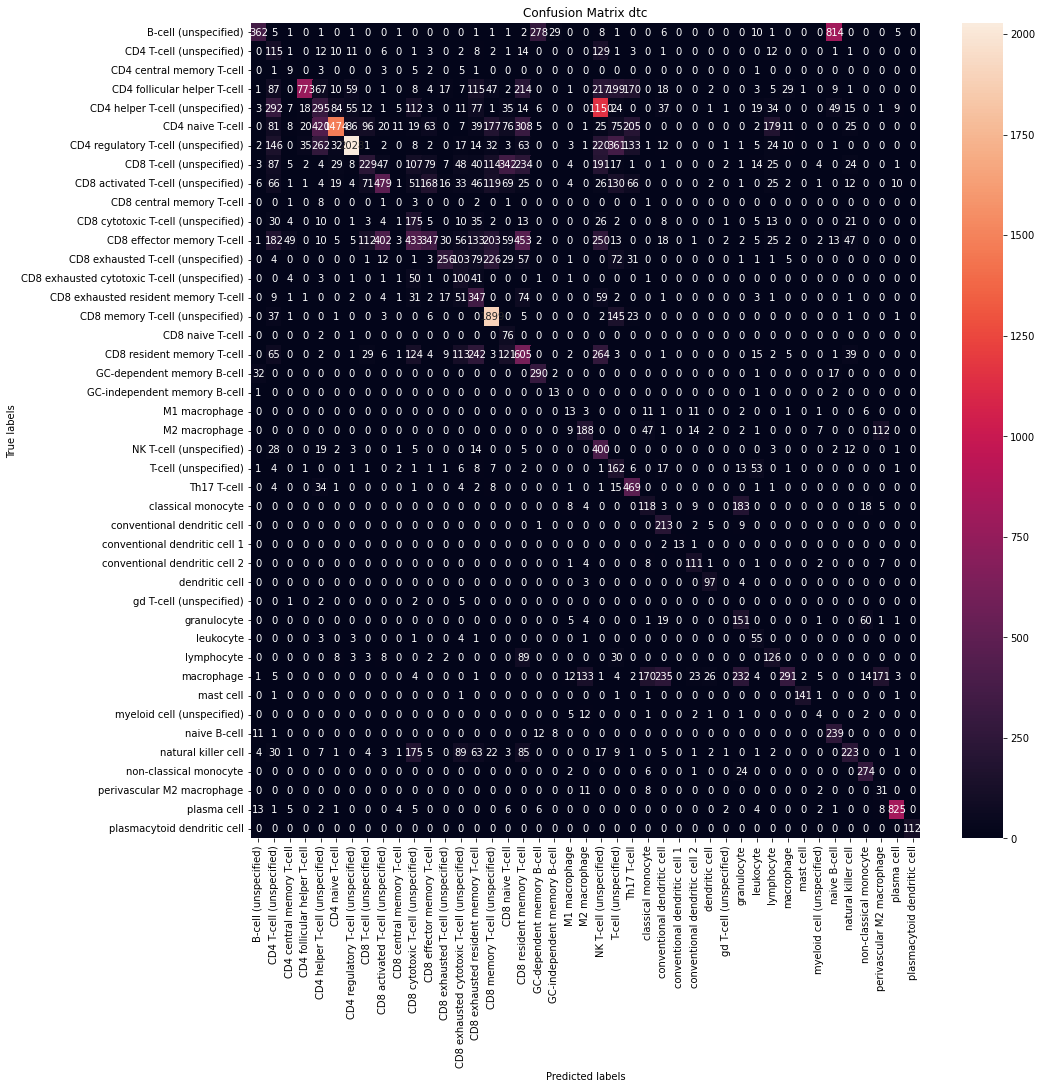

In [ ]:
fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_test)); ax.yaxis.set_ticklabels(np.unique(y_test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()